In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def maxIndex(tab):
    if(len(tab)==1):
        return tab[0]
    maxInd = 0
    maxVal = tab[0]
    curInd = 0
    for x in tab[1:]:
        curInd +=1
        if(maxVal<x):
            maxVal = x
            maxInd = curInd
    return maxInd

In [3]:
def odstraniSumnike(obj):
    tab = obj
    i = 1
    for x in tab:
        x = x.replace("š","s")
        x = x.replace("č","c")
        x = x.replace("ž","z")
        tab[i] = x
        i+=1
    return tab

In [4]:
def returnAllBut(tab, index):
    ret =[]
    for x in range(len(tab)):
        if x!= index:
            ret.append(tab[x])
    return ret

In [5]:
def returnColorOrder(order):
    tab = []
    for x in order:
        match x:
            case "Pomurska":
                tab.append("tab:blue");
            case "Podravska":
                tab.append("tab:orange");
            case "Koroska":
                tab.append("tab:green");
            case "Savinjska":
                tab.append("tab:red");
            case "Zasavska":
                tab.append("tab:purple");
            case "Posavska":
                tab.append("tab:brown");
            case "Jugovzhodna Slovenija":
                tab.append("tab:pink");
            case "Osrednjeslovenska":
                tab.append("tab:gray");
            case "Gorenjska":
                tab.append("tab:olive");
            case "Primorsko-notranjska":
                tab.append("tab:cyan");
            case "Goriska":
                tab.append("b");
            case "Obalno-kraska":
                tab.append("lightcoral");
            case _:
                tab.append("k");
                print("error Barva")
    return tab
        
        

Smrti v vseh regijah glede na način smrti.

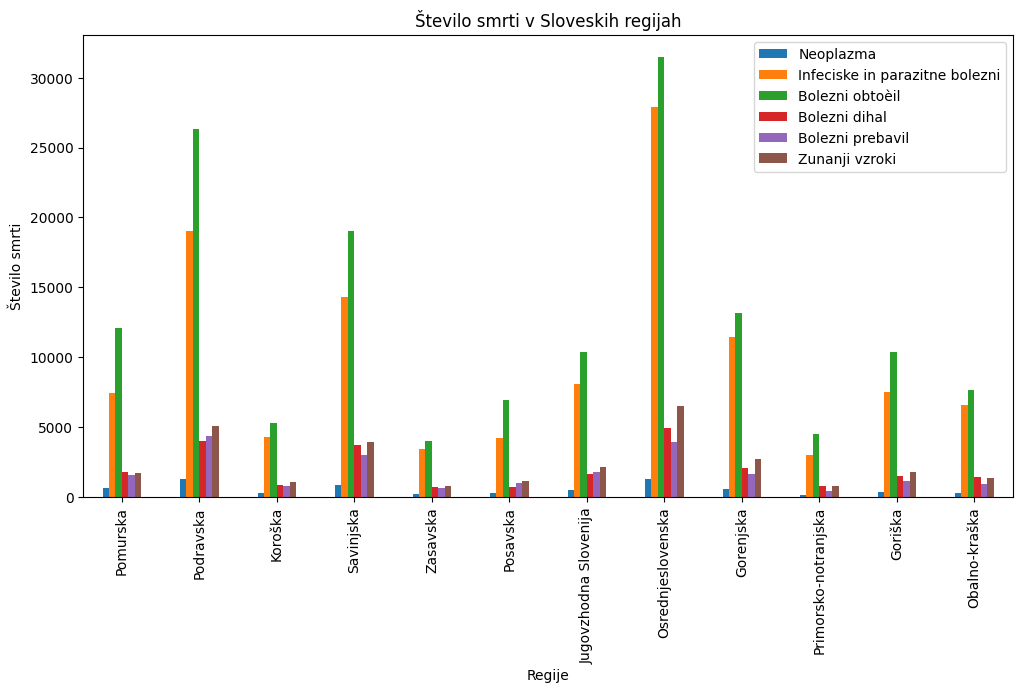

In [6]:
# branje datoteke
df = pd.read_csv('./podatki-vsi-brez-1000.csv', delimiter=';', skiprows=[0, 1], encoding='windows-1252')
# filtriramo podatke samo za moški in ženski spol ter samo za Slovenijo
Pomurska = df[(df['SPOL'] == 'Spol - SKUPAJ') & (df['STATISTIÈNA REGIJA'] == 'Pomurska')]
Podravska = df[(df['SPOL'] == 'Spol - SKUPAJ') & (df['STATISTIÈNA REGIJA'] == 'Podravska')]
Koroska = df[(df['SPOL'] == 'Spol - SKUPAJ') & (df['STATISTIÈNA REGIJA'] == 'Koroška')]
Savinjska = df[(df['SPOL'] == 'Spol - SKUPAJ') & (df['STATISTIÈNA REGIJA'] == 'Savinjska')]
Zasavska = df[(df['SPOL'] == 'Spol - SKUPAJ') & (df['STATISTIÈNA REGIJA'] == 'Zasavska')]
Posavska = df[(df['SPOL'] == 'Spol - SKUPAJ') & (df['STATISTIÈNA REGIJA'] == 'Posavska')]
Jugovzhodna = df[(df['SPOL'] == 'Spol - SKUPAJ') & (df['STATISTIÈNA REGIJA'] == 'Jugovzhodna Slovenija')]
Osrednjeslovenska = df[(df['SPOL'] == 'Spol - SKUPAJ') & (df['STATISTIÈNA REGIJA'] == 'Osrednjeslovenska')]
Gorenjska = df[(df['SPOL'] == 'Spol - SKUPAJ') & (df['STATISTIÈNA REGIJA'] == 'Gorenjska')]
Primorsko_notranjska = df[(df['SPOL'] == 'Spol - SKUPAJ') & (df['STATISTIÈNA REGIJA'] == 'Primorsko-notranjska')]
Goriska = df[(df['SPOL'] == 'Spol - SKUPAJ') & (df['STATISTIÈNA REGIJA'] == 'Goriška')]
Obalno_kraska = df[(df['SPOL'] == 'Spol - SKUPAJ') & (df['STATISTIÈNA REGIJA'] == 'Obalno-kraška')]

kraji = [Pomurska,Podravska,Koroska,Savinjska,Zasavska,Posavska,Jugovzhodna,
         Osrednjeslovenska,Gorenjska,Primorsko_notranjska,Goriska,Obalno_kraska]


tabs=[]
vzroki = ["Neoplazma",
         "Infeciske in parazitne bolezni",
         "Bolezni obtoèil",
         "Bolezni dihal",
         "Bolezni prebavil",
         "Zunanji vzroki"]
#=========SEŠTEVEK VZROKOV ZA VSAKO SMRT=======
for kraj in kraji:
    tab={"Neoplazma": 0,
         "Infeciske in parazitne bolezni":0,
         "Bolezni obtoèil":0,
         "Bolezni dihal":0,
         "Bolezni prebavil":0,
         "Zunanji vzroki":0}
    c=0
    for x in kraj.values[0][2:]:
        if(c==6):
            c=0
        if(x == "..."):
            c+=1
            continue
        tab[vzroki[c]]+=x;
        c+=1
    tabs.append(tab)
    #print(Podravska.columns[maxIndex(tab)+2])
    
    
smrti = {}
for v in vzroki:
    tab = []
    for x in tabs:
        tab.append(x[v])
    smrti[v] = tab
    
#==============SEZNAM VZROKOV=============

X = df['STATISTIÈNA REGIJA'][1:13]
frame = pd.DataFrame(data=smrti, index = X)
frame.plot( y=vzroki, kind='bar', title="V comp", figsize=(12,6), ylabel='V', rot=0);


plt.xlabel("Regije")
plt.ylabel("Število smrti")
plt.title("Število smrti v Sloveskih regijah")
plt.legend()
plt.xticks(rotation=90)
plt.show()

Kateri kateri regiji je najpogostejši vzrok smrti?

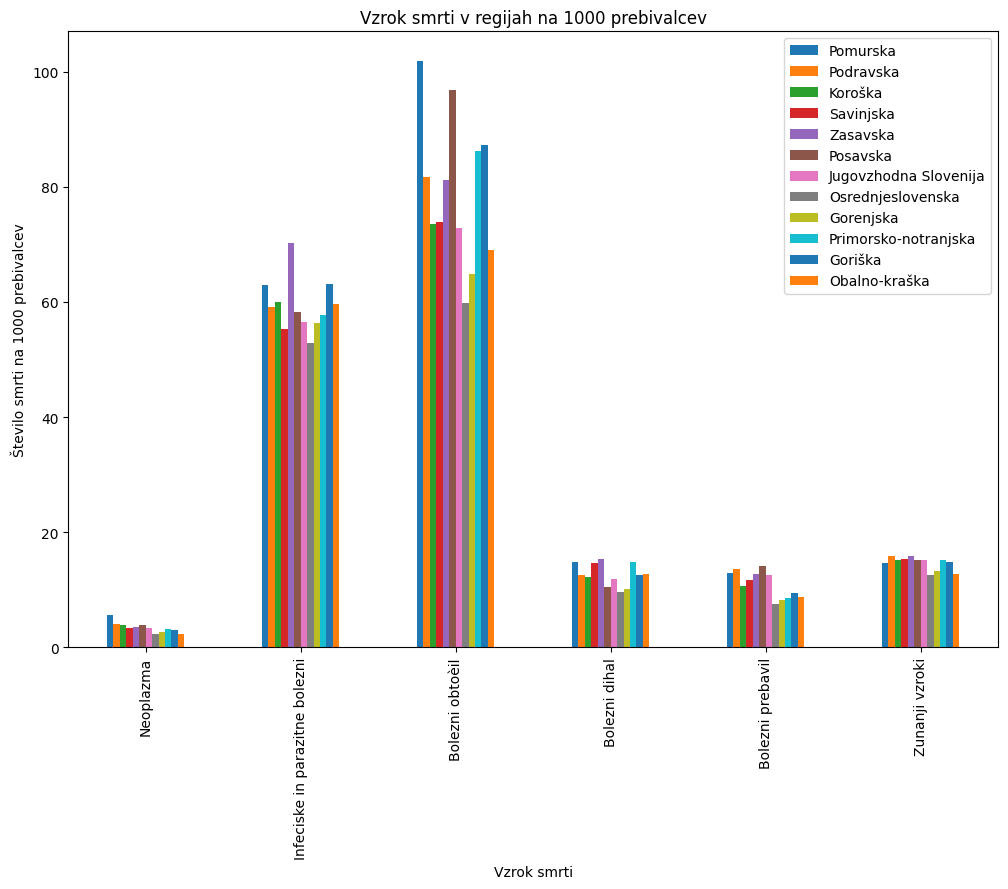

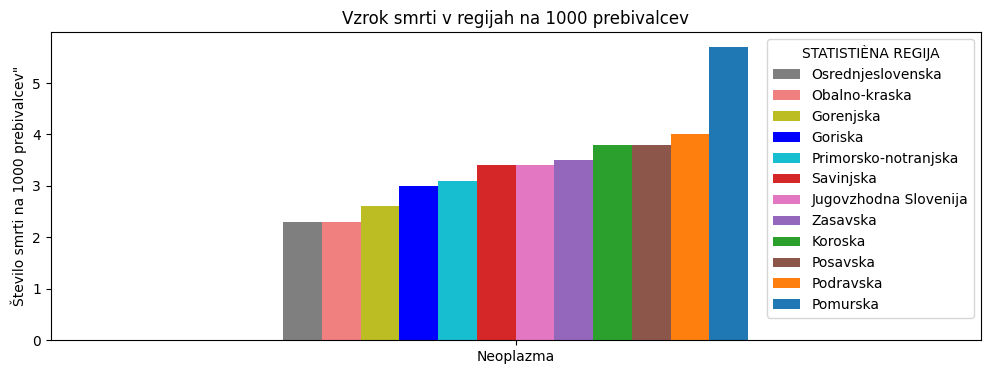

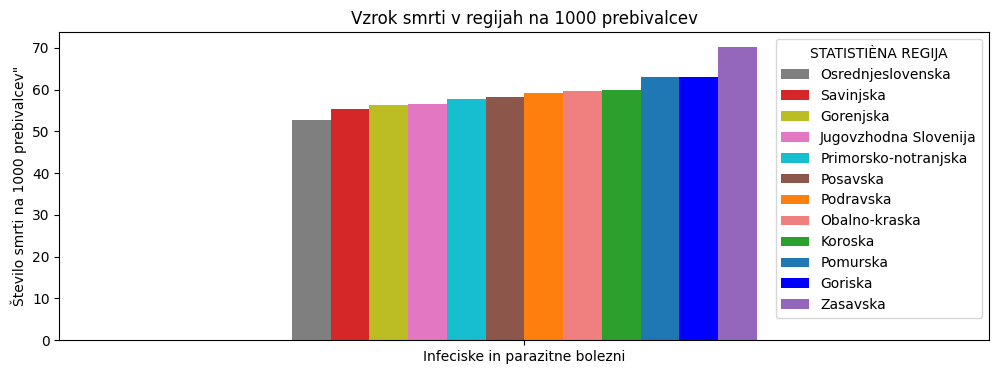

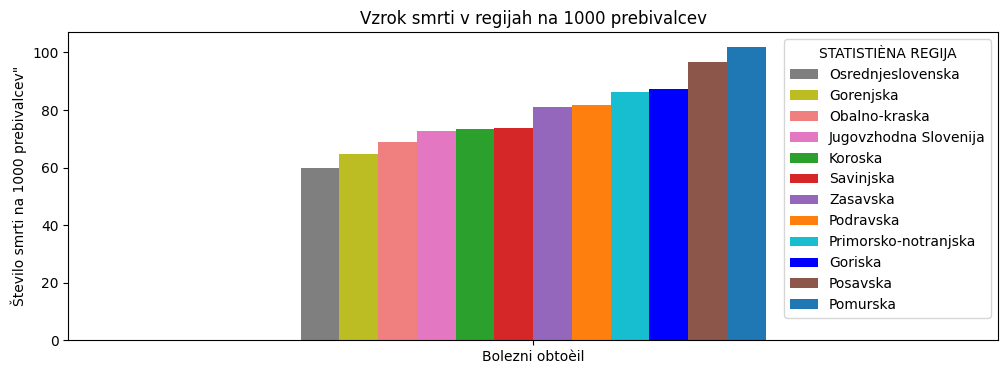

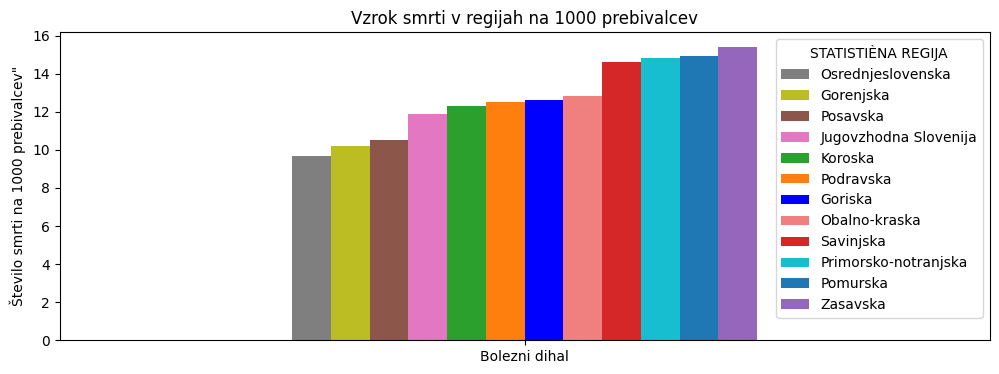

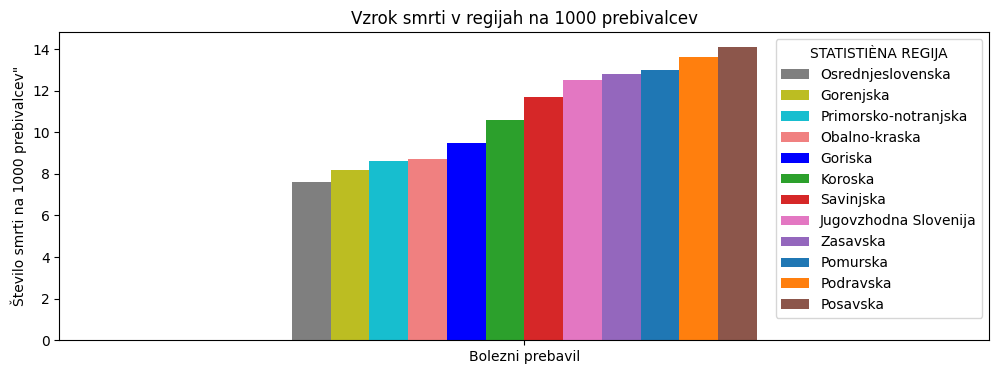

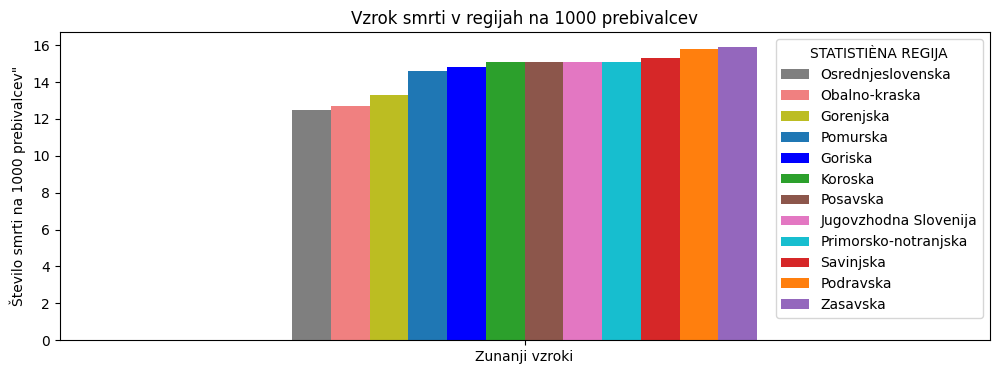

In [9]:
df = pd.read_csv('./podatki-vsi-samo-1000.csv', delimiter=';', skiprows=[0, 1], encoding='windows-1252')
# filtriramo podatke samo za moški in ženski spol ter samo za Slovenijo
Pomurska = df[(df['SPOL'] == 'Spol - SKUPAJ') & (df['STATISTIÈNA REGIJA'] == 'Pomurska')]
Podravska = df[(df['SPOL'] == 'Spol - SKUPAJ') & (df['STATISTIÈNA REGIJA'] == 'Podravska')]
Koroska = df[(df['SPOL'] == 'Spol - SKUPAJ') & (df['STATISTIÈNA REGIJA'] == 'Koroška')]
Savinjska = df[(df['SPOL'] == 'Spol - SKUPAJ') & (df['STATISTIÈNA REGIJA'] == 'Savinjska')]
Zasavska = df[(df['SPOL'] == 'Spol - SKUPAJ') & (df['STATISTIÈNA REGIJA'] == 'Zasavska')]
Posavska = df[(df['SPOL'] == 'Spol - SKUPAJ') & (df['STATISTIÈNA REGIJA'] == 'Posavska')]
Jugovzhodna = df[(df['SPOL'] == 'Spol - SKUPAJ') & (df['STATISTIÈNA REGIJA'] == 'Jugovzhodna Slovenija')]
Osrednjeslovenska = df[(df['SPOL'] == 'Spol - SKUPAJ') & (df['STATISTIÈNA REGIJA'] == 'Osrednjeslovenska')]
Gorenjska = df[(df['SPOL'] == 'Spol - SKUPAJ') & (df['STATISTIÈNA REGIJA'] == 'Gorenjska')]
Primorsko_notranjska = df[(df['SPOL'] == 'Spol - SKUPAJ') & (df['STATISTIÈNA REGIJA'] == 'Primorsko-notranjska')]
Goriska = df[(df['SPOL'] == 'Spol - SKUPAJ') & (df['STATISTIÈNA REGIJA'] == 'Goriška')]
Obalno_kraska = df[(df['SPOL'] == 'Spol - SKUPAJ') & (df['STATISTIÈNA REGIJA'] == 'Obalno-kraška')]

kraji = [Pomurska,Podravska,Koroska,Savinjska,Zasavska,Posavska,Jugovzhodna,
         Osrednjeslovenska,Gorenjska,Primorsko_notranjska,Goriska,Obalno_kraska]


tabs=[]
vzroki = ["Neoplazma",
         "Infeciske in parazitne bolezni",
         "Bolezni obtoèil",
         "Bolezni dihal",
         "Bolezni prebavil",
         "Zunanji vzroki"]
#=========SEŠTEVEK VZROKOV ZA VSAKO SMRT=======
for kraj in kraji:
    tab={"Neoplazma": 0,
         "Infeciske in parazitne bolezni":0,
         "Bolezni obtoèil":0,
         "Bolezni dihal":0,
         "Bolezni prebavil":0,
         "Zunanji vzroki":0}
    tab2 = [0,0,0,0,0,0]
    c=6
    for x in kraj.values[0][2:]:
        if(c==6):
            c=0
            continue;
        if(x == "..."):
            c+=1
            continue
        #print(x)
        tab[vzroki[c]]+=x;
        tab2[c]+=x
        c+=1
    tabs.append(tab)
    #print(Podravska.columns[maxIndex(tab2)+2])
    
    
smrti = {}
c = 1
for t in tabs:
    smrti[df['STATISTIÈNA REGIJA'][1:13][c]] = t
    c+=1

    
#==============SEZNAM VZROKOV=============

Y_old = df['STATISTIÈNA REGIJA'][1:13]

frame = pd.DataFrame(data=smrti, index = vzroki)

frame.plot( y=Y_old, kind='bar', figsize=(12,8), ylabel='Število smrti na 1000 prebivalcev"', rot=0)
frame.plot
plt.xlabel("Vzrok smrti")
plt.ylabel("Število smrti na 1000 prebivalcev")
plt.title("Vzrok smrti v regijah na 1000 prebivalcev")
plt.legend()
plt.xticks(rotation=90)
plt.show()

Y = odstraniSumnike(Y_old);


npFrame = frame.to_numpy();

Frame = pd.DataFrame(npFrame, index=vzroki, columns=Y).drop(vzroki[1:]).sort_values(by='Neoplazma', axis=1)
Frame.plot(kind='bar', title="Vzrok smrti v regijah na 1000 prebivalcev", figsize=(12,4), ylabel='Število smrti na 1000 prebivalcev"', rot=0, color = returnColorOrder(Frame.columns))


Frame = pd.DataFrame(npFrame, index=vzroki, columns=Y).drop(returnAllBut(vzroki,1)[:]).sort_values(by='Infeciske in parazitne bolezni', axis=1)
Frame.plot(kind='bar', title="Vzrok smrti v regijah na 1000 prebivalcev", figsize=(12,4), ylabel='Število smrti na 1000 prebivalcev"', rot=0, color = returnColorOrder(Frame.columns))

Frame = pd.DataFrame(npFrame, index=vzroki, columns=Y).drop(returnAllBut(vzroki,2)[:]).sort_values(by='Bolezni obtoèil', axis=1)
Frame.plot(kind='bar', title="Vzrok smrti v regijah na 1000 prebivalcev", figsize=(12,4), ylabel='Število smrti na 1000 prebivalcev"', rot=0, color = returnColorOrder(Frame.columns))

Frame = pd.DataFrame(npFrame, index=vzroki, columns=Y).drop(returnAllBut(vzroki,3)[:]).sort_values(by='Bolezni dihal', axis=1)
Frame.plot(kind='bar', title="Vzrok smrti v regijah na 1000 prebivalcev", figsize=(12,4), ylabel='Število smrti na 1000 prebivalcev"', rot=0,color = returnColorOrder(Frame.columns))

Frame = pd.DataFrame(npFrame, index=vzroki, columns=Y).drop(returnAllBut(vzroki,4)[:]).sort_values(by='Bolezni prebavil', axis=1)
Frame.plot(kind='bar', title="Vzrok smrti v regijah na 1000 prebivalcev", figsize=(12,4), ylabel='Število smrti na 1000 prebivalcev"', rot=0, color = returnColorOrder(Frame.columns))

Frame = pd.DataFrame(npFrame, index=vzroki, columns=Y).drop(returnAllBut(vzroki,5)[:]).sort_values(by='Zunanji vzroki', axis=1)
Frame.plot(kind='bar', title="Vzrok smrti v regijah na 1000 prebivalcev", figsize=(12,4), ylabel='Število smrti na 1000 prebivalcev"', rot=0, color = returnColorOrder(Frame.columns))

plt.show()
